# 1. Example: Creating a Model in DataAssimBench

In this notebook, we'll introduce the basics of how to create a model object in DataAssimBench and use generated data to train and evaluate it. We'll use Lorenz63 data generator and a reservoir computing model

In [1]:
from dabench import data
import matplotlib.pyplot as plt

In [2]:
l96 = data.Lorenz96(system_dim=6,  delta_t = 1e-2)
l96.generate(n_steps=100000)

### Part I: Import dabench.model

The "model sub-package is dabench's interface for creating and using models.

In [3]:
from rc import RCModel

In [4]:
model = RCModel(system_dim=6, 
                reservoir_dim=1600, 
                input_dim=6, 
                sparse_adj_matrix=False, 
                sparsity=0.99,
                readout_method='quadratic',
                sigma=0.07,
                spectral_radius = 0.1, 
                leak_rate=0.7,
                log_beta=-18.41)

In [5]:
model.weights_init()

In [6]:
model.state = model.generate(l96.values)

In [7]:
model.train(l96)

(6, 1600) (1600, 1600)


In [8]:
out_obj = model.predict(l96, n_steps = 1000, initial_index=100, spinup_steps=100)

In [9]:
def plot_all(out_obj, data_obj, n_steps=1000, initial_index=100):
    fig, axes = plt.subplots(6, 1, sharex = True, figsize = (10, 8))
    for j, ax in enumerate(axes):
        ax.plot(data_obj.values[initial_index:initial_index+n_steps,j], lw = 3, label = 'True')
        ax.plot(out_obj.values[:n_steps,j], lw = 3, ls = '--', label = 'Pred')
        ax.axvline(0,color = 'k', lw = 2)
        ax.set_ylabel(r'$x_{:d}$'.format(j), fontsize = 16)

    axes[0].set_title('Prediction', fontsize = 22)
    plt.legend()

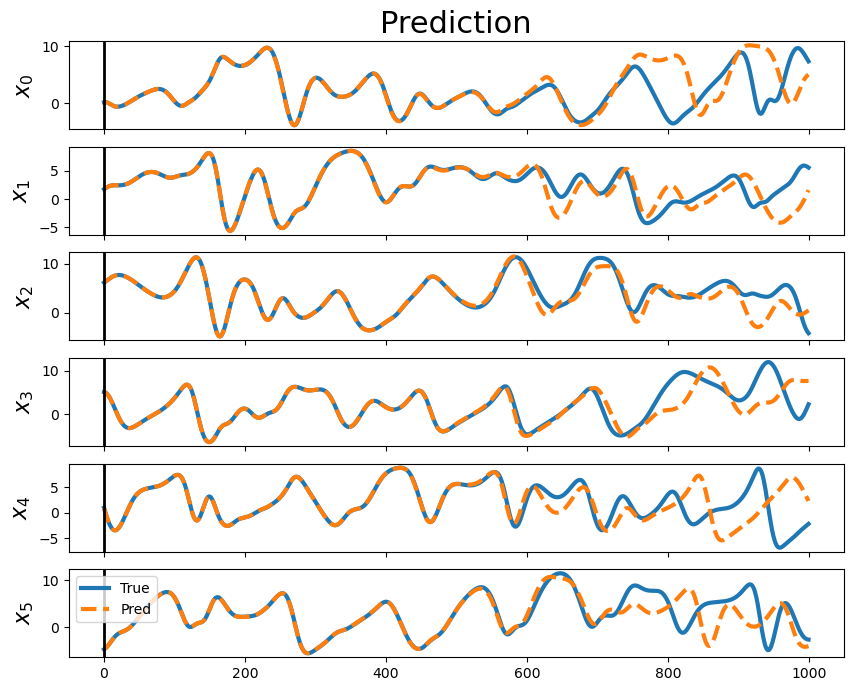

In [10]:
plot_all(out_obj, l96)